In [59]:
import pandas as pd
import shapely
import numpy as np
% matplotlib inline

In [60]:
pwd

u'/Users/lexu/Downloads'

In [61]:
df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-08.csv')

In [62]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-08-01 00:00:03,2015-08-01 00:00:07,N,5,-73.865013,40.826099,-73.864990,40.826099,1,...,7.0,0.0,0.0,0.0,0.0,NaN,0.0,7.0,1,2.0
1,2,2015-08-01 00:01:57,2015-08-01 00:02:00,N,2,-73.987335,40.692123,-73.987328,40.692123,1,...,52.0,0.0,0.5,0.0,0.0,NaN,0.3,52.8,2,1.0
2,2,2015-08-01 00:00:30,2015-08-01 00:01:31,N,1,-73.949959,40.827183,-73.952377,40.824036,1,...,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,1,1.0
3,2,2015-08-01 00:01:08,2015-08-01 00:01:40,N,1,-73.944977,40.808582,-73.945923,40.807316,1,...,2.5,0.5,0.5,0.0,0.0,NaN,0.3,3.8,2,1.0
4,2,2015-08-01 00:00:38,2015-08-01 00:02:00,N,1,-73.951561,40.812111,-73.952171,40.812458,1,...,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


## get the ct & get the point of lat and long

In [63]:
from geopandas import GeoDataFrame
shape_path="CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

In [64]:
type(ct_shape)

geopandas.geodataframe.GeoDataFrame

In [65]:
df['lonlat']=zip(df.Dropoff_longitude,df.Dropoff_latitude)
df['point']=df[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,lonlat,point
0,2,2015-08-01 00:00:03,2015-08-01 00:00:07,N,5,-73.865013,40.826099,-73.864990,40.826099,1,...,0.0,0.0,0.0,NaN,0.0,7.0,1,2.0,"(-73.8649902344, 40.8260993958)",POINT (-73.864990234375 40.82609939575195)
1,2,2015-08-01 00:01:57,2015-08-01 00:02:00,N,2,-73.987335,40.692123,-73.987328,40.692123,1,...,0.5,0.0,0.0,NaN,0.3,52.8,2,1.0,"(-73.9873275757, 40.6921234131)",POINT (-73.98732757568358 40.69212341308594)
2,2,2015-08-01 00:00:30,2015-08-01 00:01:31,N,1,-73.949959,40.827183,-73.952377,40.824036,1,...,0.5,0.0,0.0,NaN,0.3,4.3,1,1.0,"(-73.9523773193, 40.8240356445)",POINT (-73.95237731933594 40.82403564453125)
3,2,2015-08-01 00:01:08,2015-08-01 00:01:40,N,1,-73.944977,40.808582,-73.945923,40.807316,1,...,0.5,0.0,0.0,NaN,0.3,3.8,2,1.0,"(-73.9459228516, 40.8073158264)",POINT (-73.9459228515625 40.80731582641602)
4,2,2015-08-01 00:00:38,2015-08-01 00:02:00,N,1,-73.951561,40.812111,-73.952171,40.812458,1,...,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0,"(-73.9521713257, 40.8124580383)",POINT (-73.95217132568358 40.81245803833008)


In [66]:
index_rand = np.random.choice(df.index,1000, replace=True)

In [67]:
df_drop_rand = df.iloc[index_rand]

In [68]:
df_drop_rand.index = range(1000)

In [69]:
ct_shape.BoroCT2010 = ct_shape.BoroCT2010.astype(str)

In [70]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print('total NYC land area: %s (mi^2)'%str(NYC_Area)[:5]) # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


In [71]:
a=[]

for i in range(len(df_drop_rand)):
    a.append(ct_shape[ct_shape.geometry.intersects(df_drop_rand.iloc[i].point)].BoroCT2010.values)
    print '\r',"%",str((i+1)*100./len(df_drop_rand))[:4],
    
df_drop_rand['BoroCT2010']=a

% 100.


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [76]:
df_drop_rand.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,lonlat,point,BoroCT2010
0,2,2015-08-23 02:43:47,2015-08-23 02:50:57,N,1,-73.954773,40.805176,-73.938301,40.817459,1,...,0.0,0.0,NaN,0.3,8.8,1,1.0,"(-73.9383010864, 40.8174591064)",POINT (-73.93830108642578 40.81745910644531),1021400
1,2,2015-08-15 22:09:25,2015-08-15 22:21:02,N,1,-73.872116,40.734451,-73.884369,40.755497,1,...,0.0,0.0,NaN,0.3,10.3,2,1.0,"(-73.8843688965, 40.7554969788)",POINT (-73.88436889648438 40.75549697875977),4028100
2,2,2015-08-01 23:53:37,2015-08-02 00:03:04,N,1,-73.948616,40.711224,-73.938385,40.683186,1,...,0.0,0.0,NaN,0.3,10.8,1,1.0,"(-73.9383850098, 40.6831855774)",POINT (-73.93838500976562 40.68318557739258),3027500
3,2,2015-08-30 20:26:39,2015-08-30 20:30:53,N,1,-73.956245,40.747776,-73.953354,40.742149,2,...,0.0,0.0,NaN,0.3,6.3,2,1.0,"(-73.9533538818, 40.742149353)",POINT (-73.95335388183594 40.74214935302734),4000700
4,2,2015-08-13 22:12:06,2015-08-13 22:18:33,N,1,-73.829926,40.713730,-73.812248,40.679169,1,...,0.0,0.0,NaN,0.3,11.3,1,1.0,"(-73.81224823, 40.6791687012)",POINT (-73.81224822998048 40.67916870117188),4017400


In [75]:
df_drop_rand.BoroCT2010 = df_drop_rand.BoroCT2010.apply(lambda x: str(x)[2:-2])

In [77]:
ct_shape = GeoDataFrame.merge(ct_shape, df_drop_rand, on = "BoroCT2010", how = "inner")

In [78]:
ct_shape = GeoDataFrame(ct_shape)

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


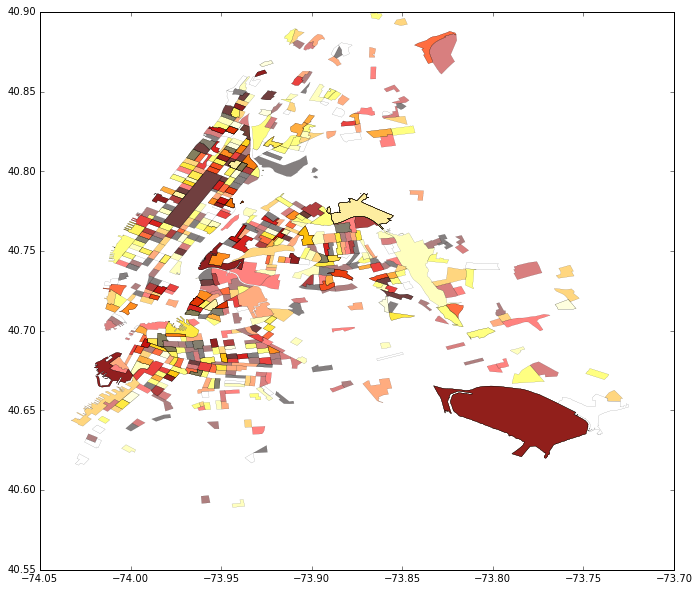

In [82]:
import matplotlib.pylab as plt
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(121)
ct_shape.plot( alpha=0.5, linewidth=0.1, ax=ax, cmap='hot')
#ax.set_title("Tip percentage")
plt.legend()